<a href="https://colab.research.google.com/github/pranay2310/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [61]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
data = pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone project/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [64]:
data.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5188,s5189,Movie,Revolutionary Road,Sam Mendes,"Leonardo DiCaprio, Kate Winslet, Kathy Bates, ...","United States, United Kingdom","November 1, 2019",2008,R,120 min,"Dramas, Romantic Movies",April and Frank's marriage unravels when a pla...
4892,s4893,Movie,Pocoyo Halloween: Spooky Movies,NaN,"Stephen Fry, Montana Smedley",NaN,"May 1, 2018",2014,TV-Y,22 min,Movies,Pocoyo finds a special toy and plays new games...
6339,s6340,TV Show,The Expanding Universe of Ashley Garcia,NaN,"Paulina Chávez, Jencarlos Canela",United States,"December 9, 2020",2020,TV-PG,3 Seasons,"Kids' TV, TV Comedies, Teen TV Shows",15-year-old scientist Ashley Garcia explores t...
3792,s3793,Movie,LoveTrue,Alma Har'el,NaN,United States,"May 7, 2017",2016,TV-MA,82 min,Documentaries,In this blend of documentary and dramatization...
5077,s5078,Movie,Raja Hindustani,Dharmesh Darshan,"Aamir Khan, Karisma Kapoor, Suresh Oberoi, Joh...",India,"May 1, 2017",1996,TV-14,177 min,"Dramas, International Movies, Romantic Movies",When a poor taxi driver falls in love with a w...


In [65]:
data.shape

(7787, 12)

In [66]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [67]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

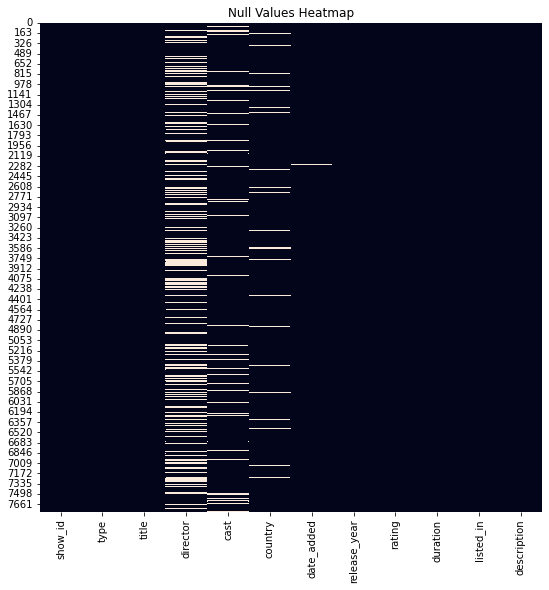

In [68]:
sns.heatmap(data.isnull(), cbar=False)
plt.title('Null Values Heatmap')
plt.show()

In [69]:
data.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [70]:
data.duplicated().sum()

0

In [71]:
netflix = data.copy()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


##handling Missing and NULL values

Null value treatment

1. RATING - As rating column has 0.08% null values , so replacing nulls with mose frequent TV-MA rating.

2. CAST - cast column has too many different values and more than 9% are missing, so there is no need to keep it but we are keeping it to perform EDA

3. DATE - there are few missing values for date column. so, lets drop missing value rows.

4. DIRECTOR - Director column has more then 30% null values so dropping that column

5. Country - As Country columns has 6.51% null value, we dropping rows with missing value.

In [73]:
data= data.drop(columns= ['director'],axis=1)

In [74]:
data['rating'].replace(np.nan, 'TV-MA',inplace  = True)

data['cast'].replace(np.nan, 'missing info',inplace  = True)

In [75]:
data = data.dropna(subset=["country","date_added"],axis=0) 

In [76]:
data.isnull().sum()/data.shape[0]*100

show_id         0.0
type            0.0
title           0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

In [77]:
data['country'].replace(np.nan, 'United States',inplace  = True)

data shape after removing treating null value

In [78]:
print(f' After null value treatment \n Number of observation : {data.shape[0]} \n Number of Features: {data.shape[1]}')

 After null value treatment 
 Number of observation : 7271 
 Number of Features: 11


Converting date format to more features (year, month, date of released)

In [79]:
data["date_added"] = pd.to_datetime(data['date_added'])
data['added_year'] = data['date_added'].dt.year
data['added_month'] = data['date_added'].dt.strftime("%B")

Convert datatype from string to int. 

In [80]:
data['duration']=data['duration'].str.replace('Season','')
data['duration']=data['duration'].str.replace('s','')
data['duration']=data['duration'].str.replace('min','')

data['duration']=data['duration'].astype(str).astype(int)
data['duration']

0         4
1        93
2        78
3        80
4       123
       ... 
7781     88
7782     99
7783    111
7785      1
7786     90
Name: duration, Length: 7271, dtype: int64

In [81]:
data_copy = data.copy()

In [82]:
data_copy = data_copy.rename(columns={"listed_in":"genre"})
data_copy["genre"] = data_copy["genre"].apply(lambda x: x.split(",")[0])

In [83]:
print(f'Total Number of unique genre: {data_copy.genre.value_counts().size}')



Total Number of unique genre: 36


In [84]:
data_copy.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,genre,description,added_year,added_month
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4,International TV Shows,In a future where the elite inhabit an island ...,2020,August
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93,Dramas,After a devastating earthquake hits Mexico Cit...,2016,December
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78,Horror Movies,"When an army recruit is found dead, his fellow...",2018,December
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi...",2017,November
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123,Dramas,A brilliant group of students become card-coun...,2020,January


In [85]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7271 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7271 non-null   object        
 1   type          7271 non-null   object        
 2   title         7271 non-null   object        
 3   cast          7271 non-null   object        
 4   country       7271 non-null   object        
 5   date_added    7271 non-null   datetime64[ns]
 6   release_year  7271 non-null   int64         
 7   rating        7271 non-null   object        
 8   duration      7271 non-null   int64         
 9   genre         7271 non-null   object        
 10  description   7271 non-null   object        
 11  added_year    7271 non-null   int64         
 12  added_month   7271 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 795.3+ KB


In [86]:
data_copy.describe(include=["O"])

,show_id,type,title,cast,country,rating,genre,description,added_month
count,7271,7271,7271,7271,7271,7271,7271,7271,7271
unique,7271,2,7271,6469,681,14,36,7263,12
top,s1,Movie,3%,missing info,United States,TV-MA,Dramas,A scheming matriarch plots to cut off her disa...,December
freq,1,5147,1,622,2549,2708,1353,2,774


#EDA

##univariant analysis

In [88]:
#size of graph
plt.rcParams["figure.figsize"] = [10,6]

### coloumn 1: show id

In [89]:
# is show id is unique for every entry?
data_copy["show_id"].nunique()

7271

Show_id is unique for every observation

### column 2: type : Identifier - A Movie or TV Show

In [91]:
data_copy["type"].unique()

array(['TV Show', 'Movie'], dtype=object)

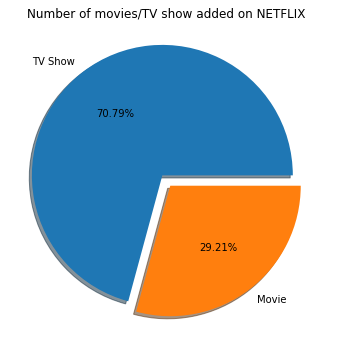

In [92]:
#
plt.pie(data_copy["type"].value_counts(),labels=data_copy["type"].unique(),
        shadow=True,
        autopct='%1.2f%%',
        explode=(0.1, 0.0))
plt.title("Number of movies/TV show added on NETFLIX  ")
plt.show()

### column 3: title : Title of the Movie / Tv Show

In [93]:
# is title is unique for every entry?
print(f' unique title: {data_copy["title"].nunique()}')

 unique title: 7271


All title are unique

### coloums 5: cast : Actors involved in the movie / show

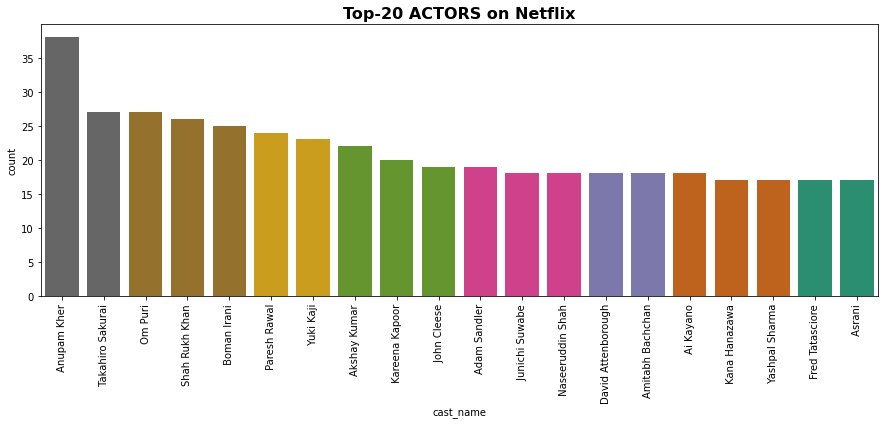

In [94]:
data_copy['cast_name'] = data_copy['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in data_copy['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:21]
plt.figure(figsize=(15,5))
sns.barplot(x='cast_name',y='count',data=df_cast_count,palette="Dark2_r")
plt.title("Top-20 ACTORS on Netflix",size='16',fontweight="bold")
plt.xticks(rotation=90)
plt.show()

### coloums 6: country : Country where the movie / show was produced

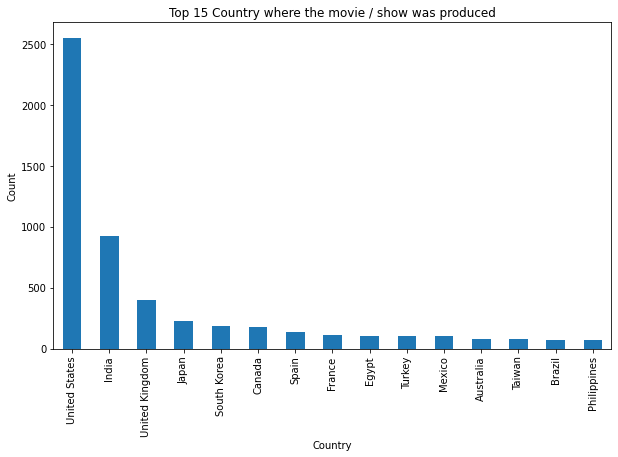

In [95]:
#top 15 country where the movie/shows was produced
data_copy["country"].value_counts()[:15].sort_values(ascending=False).plot(kind="bar")
plt.title("Top 15 Country where the movie / show was produced")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

In [87]:
data.director.fillna("No Director", inplace=True)
data.cast.fillna("No Cast", inplace=True)
data.country.fillna("Country Unavailable", inplace=True)
data.dropna(subset=["date_added", "rating"], inplace=True)

AttributeError: ignored

##Convert Date Time format

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df['day_added'] = df['date_added'].dt.day
df['year_added'] = df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df['year_added'].astype(int);
df['day_added'].astype(int);

#Exploratory Data Analysis

##Univarient Analysis

In [ ]:
# is show id is unique for every entry?
data_copy["show_id"].nunique()

Show_id is unique for every observation

## Type: Movie and TV Shows

In [ ]:
sns.countplot(netflix['type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Type')

In [ ]:
labels = ['Movie', 'TV show']
size = netflix['type'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 2))
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size,labels=labels, colors = colors, explode = explode, shadow = True, startangle = 90)
plt.title('Distribution of Type', fontsize = 25)
plt.legend()
plt.show()

## Director

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.director))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('director.png')
plt.show()

In [ ]:
filtered_directors = df[df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = filtered_directors, order=filtered_directors.value_counts().index[:10], palette='Blues')
plt.show()

## Cast

In [ ]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.cast))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('cast.png')
plt.show()

### Top Actor on Netflix based on the number of titles

In [ ]:
filtered_cast_shows = df[df.cast != 'No Cast'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = filtered_cast_shows, order=filtered_cast_shows.value_counts().index[:10], palette='pastel')
plt.show()

In [ ]:
filtered_cast_movie = df[df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = filtered_cast_movie, order=filtered_cast_movie.value_counts().index[:10], palette='pastel')
plt.show()

## country

In [ ]:
#Top 10 Countries in which movies and TV shows were addded
df['country'].value_counts()[:10]

In [ ]:
fig = plt.figure(figsize=(12,6))
sns.countplot(data = df,y = 'country', order = df["country"].value_counts().index[:10],hue = 'type',palette = 'magma_r')
plt.title("Top countries having most content")
plt.show()

In [ ]:
df.head()

##release_year

###COlioums 7: date_added : Date it was added on Netflix

As we converted date added to year added and month added.

In [ ]:
df["year_added"].value_counts()

In [ ]:
sns.countplot(x="year_added", data=df)
plt.title("Number of movie/show added on year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

In [ ]:
sns.countplot(x="month_added", data=df)
plt.title("Number of movie/show added on month")
plt.xlabel("Months")
plt.xticks(rotation =45)
plt.show()